# Asymptotic Expansions
George Poole grp39@cam.ac.uk

## Laplace's Method

Laplace's method shows that for a function $F(x)$ given by

$$F(x)=\int_a^b f(t)e^{x\phi(t)}~\text{d}t~~~,$$

where $\phi(t)$ has a maximum at $c\in(a,b)$, the first-order asympotic expansion as $x\to\infty$ is

$$F(x)\sim\bigg(\frac{2\pi}{-x\phi''(c)}\bigg)^{1/2}f(c)e^{x\phi(c)}~~~.$$

For example, let's consider

$$F(x)=\int_1^5 \ln(t)e^{x(3t-t^2)}~\text{d}t$$

which has 

$$\phi(t)=3t-t^2$$

and hence $c=3/2$, which gives

$$F(x)\sim\bigg(\frac{\pi}{x}\bigg)^{1/2}\ln\bigg(\frac{3}{2}\bigg)e^{9x/4}$$

as $x\to\infty$.

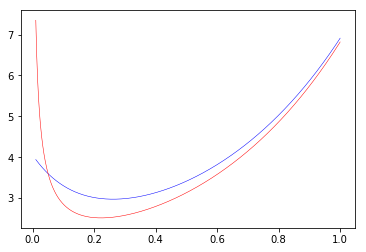

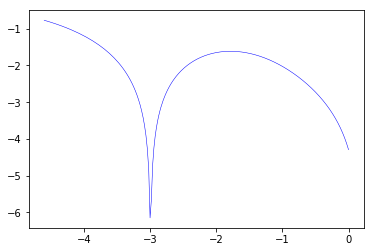

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def F(x):
    func=lambda t: np.log(t)*np.exp(x*(3*t-t**2)) 
    return quad(func,1,5)[0]

vec_F=[]

X=np.linspace(0.01,1,num=1000)

for x in X:
    vec_F.append(F(x))
    
asym=np.sqrt(np.pi/X)*np.log(1.5)*np.exp(9*X/4)
rel_error=np.abs((vec_F-asym)/asym)

plt.figure(1)
plt.plot(X,vec_F,lw=0.5,color='b')
plt.plot(X,asym,lw=0.5,color='r')

plt.figure(2)
plt.plot(np.log(X),np.log(rel_error),lw=0.5,color='b')

plt.show()

The relative error plot above shows that the asymptotic expansion is valid.

## Method Of Stationary Phase

The method of stationary phase shows that for a function $F(x)$ given by

$$F(x)=\int_a^b f(t)e^{ix\phi(t)}~\text{d}t~~~,$$

where $\phi(t)$ has turning points at $c_k\in(a,b)$, the first-order asympotic expansion as $x\to\infty$ is

$$F(x)\sim\sum_k\bigg(\frac{2\pi}{-ix\phi''(c_k)}\bigg)^{1/2}f(c_k)e^{ix\phi(c_k)}~~~.$$

For example, consider the function

$$F(x)=\int_0^{2\pi}e^{ix\sin t}~\text{d}t~~~.$$

for which $\phi(t)=\sin t$ has turning points at $c_k=\pi/2,3\pi/2$. It is instuctive to split this integral into its real and imaginary parts:

$$F_R(x)=\text{Re}(F(x))=\int_0^{2\pi}\cos(x\sin(t))~\text{d}t$$

$$F_I(x)=\text{Im}(F(x))=\int_0^{2\pi}\sin(x\sin(t))~\text{d}t~~~.$$

Changing the dummy variable $t\to-t$ yields $F_I=-F_I$ for all $x$, so $F_I=0$ and $F(x)\in\mathbb{R}$. Applying the method, we get

$$F(x)\sim\bigg(\frac{2\pi}{ix}\bigg)^{1/2}e^{ix}+\bigg(\frac{2\pi}{-ix}\bigg)^{1/2}e^{-ix}$$

$$F(x)\sim4\sqrt{\frac{\pi}{x}}\cos(x-\tfrac{\pi}{4})~~~.$$

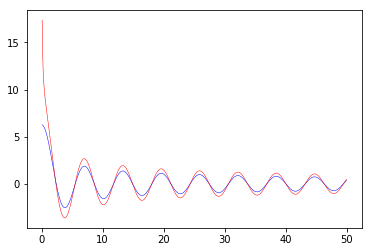

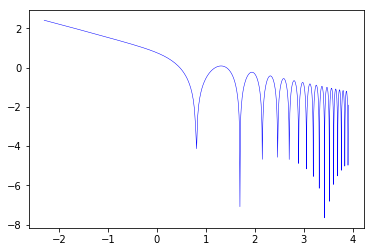

In [166]:
def FR(x):
    func=lambda t: np.cos(x*np.sin(t)) 
    return quad(func,0,2*np.pi)[0]

vec_FR=[]

X=np.linspace(0.1,50,num=1000)

for x in X:
    vec_FR.append(FR(x))
    
asymR=4*np.sqrt(np.pi/X)*np.cos(X-np.pi/4)
error=np.abs(vec_FR-asymR)

plt.figure(1)
plt.plot(X,vec_FR,lw=0.5,color='b')
plt.plot(X,asymR,lw=0.5,color='r')

plt.figure(2)
plt.plot(np.log(X),np.log(error),lw=0.5,color='b')

plt.show()

Asymptotic expansions are particularly useful for approximating this type of integral at very large $x$, in which case numerical integration becomes difficult due to the oscillatory nature of the integrand. This is demonstrated by the bad behaviour in the plot below.

/Users/George/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/George/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


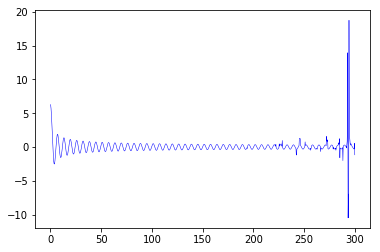

In [134]:
X=np.linspace(0.01,300,num=1000)

vec_FR=[]

for x in X:
    vec_FR.append(FR(x))
    
plt.plot(X,vec_FR,lw=0.5,color='b')
plt.show()

## Related Courses

* Asymptotic Methods, Part II Mathematics